In [1]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

import pandas as pd
import os
import numpy as np
import glob
import scipy

from mpl_toolkits.mplot3d import Axes3D
# import seaborn

In [2]:

# uni = "20230116_fea1_maxpool_aggrmax_ly5_cl3_k5"
# uni = "20230116_fea1_maxpool_aggrmean_ly5_cl3_k5"
# uni = "20230116_fea1_maxpool_aggradd_ly5_cl3_k5"
# uni = "20230116_fea1_meanpool_aggrmax_ly5_cl3_k5"
# uni = "20230116_fea1_meanpool_aggrmean_ly5_cl3_k5"
# uni = "20230116_fea1_meanpool_aggradd_ly5_cl3_k5"

# uni = "20230116_fea2_maxpool_aggrmax_ly5_cl3_k5"
# uni = "20230116_fea2_maxpool_aggrmean_ly5_cl3_k5"
# uni = "20230116_fea2_maxpool_aggradd_ly5_cl3_k5"
# uni = "20230116_fea2_meanpool_aggrmax_ly5_cl3_k5"
# uni = "20230116_fea2_meanpool_aggrmean_ly5_cl3_k5"
# uni = "20230116_fea2_meanpool_aggradd_ly5_cl3_k5"

uni = "20230116_fea1_maxpool_aggrmax_ly5_cl4_k5"
# uni = "20230116_fea1_maxpool_aggrmean_ly5_cl4_k5"
# uni = "20230116_fea1_maxpool_aggradd_ly5_cl4_k5"
# uni = "20230116_fea1_meanpool_aggrmax_ly5_cl4_k15"
# uni = "20230116_fea1_meanpool_aggrmean_ly5_cl4_k5"
# uni = "20230116_fea1_meanpool_aggradd_ly5_cl4_k5"

# uni = "20230116_fea2_maxpool_aggrmax_ly5_cl4_k5"
# uni = "20230116_fea2_maxpool_aggrmean_ly5_cl4_k5"
# uni = "20230116_fea2_maxpool_aggradd_ly5_cl4_k5"
# uni = "20230116_fea2_meanpool_aggrmax_ly5_cl4_k5"
# uni = "20230116_fea2_meanpool_aggrmean_ly5_cl4_k5"
# uni = "20230116_fea2_meanpool_aggradd_ly5_cl4_k5"
uni = "20221207_jade_charge_test_homo2"
path = "/users/yewzzang/work/JSNS2_vertex/result/*"+uni +"*/*"+uni +".csv"
pred_path = glob.glob(path)
pred_list = [file for file in pred_path if file.endswith(".csv")]



In [3]:
df = pd.read_csv(pred_list[0])

In [4]:
# pred = np.array(df['prediction']).reshape(-1,4)
# label = np.array(df['label']).reshape(-1,4)
# jade = np.array(df['jade']).reshape(-1,4)

pred = np.array(df['prediction']).reshape(-1,3)
label = np.array(df['label']).reshape(-1,3)
jade = np.array(df['jade']).reshape(-1,3)

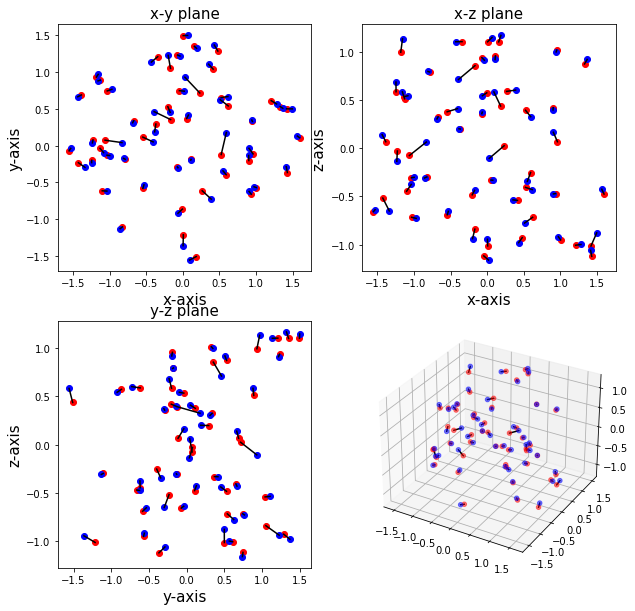

In [5]:
fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(221)
ax1.scatter(pred[:50,0],pred[:50,1],color='r')
ax1.scatter(label[:50,0],label[:50,1],color='b')
for i in range(50):
    ax1.plot([pred[i,0],label[i,0]],[pred[i,1],label[i,1]],'k-')
ax1.set_title('x-y plane',fontsize=15)
ax1.set_xlabel('x-axis',fontsize=15)
ax1.set_ylabel('y-axis',fontsize=15)

ax2 = fig.add_subplot(222)
ax2.scatter(pred[:50,0],pred[:50,2],color='r')
ax2.scatter(label[:50,0],label[:50,2],color='b')
for i in range(50):
    ax2.plot([pred[i,0],label[i,0]],[pred[i,2],label[i,2]],'k-')
ax2.set_title('x-z plane',fontsize=15)
ax2.set_xlabel('x-axis',fontsize=15)
ax2.set_ylabel('z-axis',fontsize=15)

ax3 = fig.add_subplot(223)
ax3.scatter(pred[:50,1],pred[:50,2],color='r')
ax3.scatter(label[:50,1],label[:50,2],color='b')
for i in range(50):
    ax3.plot([pred[i,1],label[i,1]],[pred[i,2],label[i,2]],'k-')
ax3.set_title('y-z plane',fontsize=15)
ax3.set_xlabel('y-axis',fontsize=15)
ax3.set_ylabel('z-axis',fontsize=15)


ax4 = fig.add_subplot(224, projection='3d')
ax4.scatter(pred[:50,0], pred[:50,1], pred[:50,2], color = 'r', alpha = 0.5)
ax4.scatter(label[:50,0], label[:50,1], label[:50,2], color = 'b', alpha = 0.5)
# ax.plot3D([0,1],[0,1],[0,1])
# ax.plot3D([pred[:1,0][0],label[:1,0][0]],[pred[:1,1][0],label[:1,1][0]],[pred[:1,2][0],label[:1,2][0]])
for i in range(50):
    ax4.plot3D([pred[i,0],label[i,0]],
            [pred[i,1],label[i,1]],
            [pred[i,2],label[i,2]],'black')



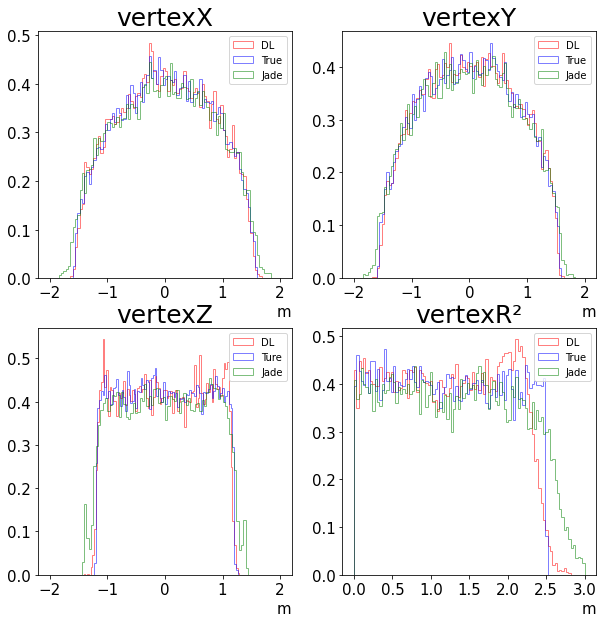

In [6]:
plt.rcParams['figure.figsize'] = (10, 10)
plt.subplot(2,2,1)
plt.hist(pred[:,0], bins = 100, range = [-2,2], color= 'r', alpha = 0.5, density = True, histtype = 'step',label = 'DL')
plt.hist(label[:,0], bins = 100, range = [-2,2], color= 'b', alpha = 0.5, density = True, histtype = 'step',label = 'True')
plt.hist(jade[:,0], bins = 100, range = [-2,2], color= 'g', alpha = 0.5, density = True, histtype = 'step',label = 'Jade')

plt.title('vertexX',fontsize = 25)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("m", fontsize=15, loc='right')
plt.legend()


plt.subplot(2,2,2)
plt.hist(pred[:,1], bins = 100, range = [-2,2], color= 'r', alpha = 0.5, density = True, histtype = 'step',label = 'DL')
plt.hist(label[:,1], bins = 100, range = [-2,2], color= 'b', alpha = 0.5, density = True, histtype = 'step',label = 'True')
plt.hist(jade[:,1], bins = 100, range = [-2,2], color= 'g', alpha = 0.5, density = True, histtype = 'step',label = 'Jade')

plt.title('vertexY',fontsize = 25)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("m", fontsize=15, loc='right')
plt.legend()

plt.subplot(2,2,3)
plt.hist(pred[:,2], bins = 100, range = [-1.5,1.5], color= 'r', alpha = 0.5, density = True, histtype = 'step',label = 'DL')
plt.hist(label[:,2], bins = 100, range = [-1.5,1.5], color= 'b', alpha = 0.5, density = True, histtype = 'step',label = 'Ture')
plt.hist(jade[:,2], bins = 100, range = [-2,2], color= 'g', alpha = 0.5, density = True, histtype = 'step',label = 'Jade')
plt.title('vertexZ',fontsize = 25)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("m", fontsize=15, loc='right')
plt.legend()


plt.subplot(2,2,4)
plt.hist((pred[:,0]**2+pred[:,1]** 2), bins = 100, range = [0,3], color= 'r', alpha = 0.5, density = True, histtype = 'step',label = 'DL')
plt.hist((label[:,0]**2+label[:,1]**2), bins = 100, range = [0,3], color= 'b', alpha = 0.5, density = True, histtype = 'step',label = 'True')
plt.hist((jade[:,0]**2+jade[:,1]**2), bins = 100, range = [0,3], color= 'g', alpha = 0.5, density = True, histtype = 'step',label = 'Jade')

plt.title('vertexR\u00b2',fontsize = 25)
plt.xticks(fontsize = 15)
plt.yticks(fontsize = 15)
plt.xlabel("m", fontsize=15, loc='right')
plt.legend()
plt.show()


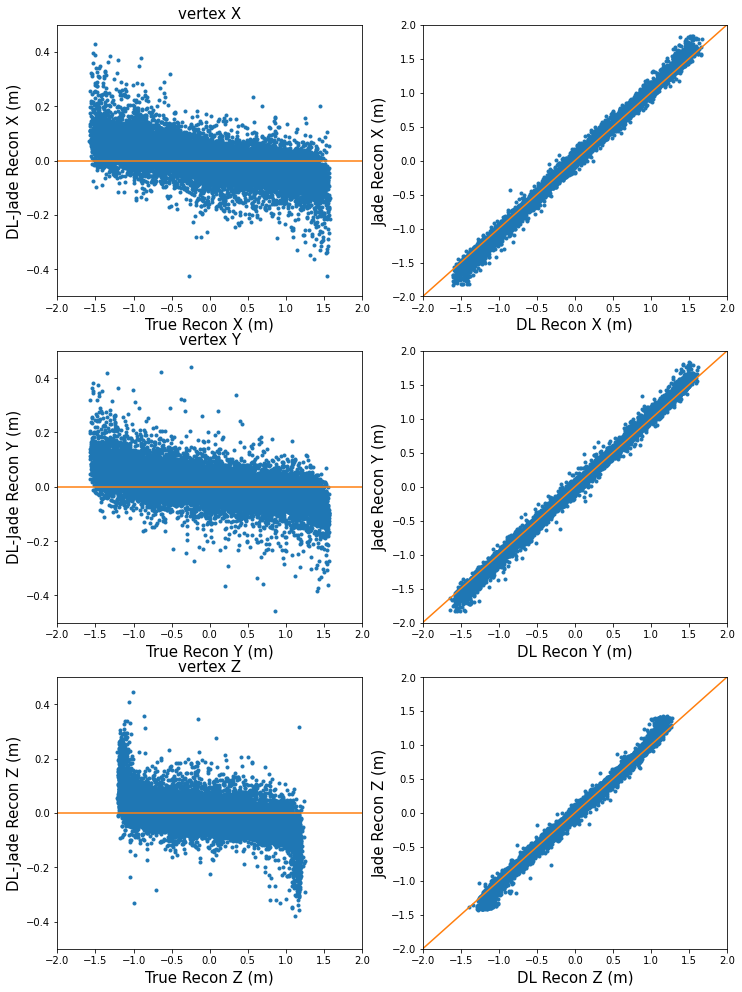

In [7]:
plt.rcParams['figure.figsize'] = (12, 17)
plt.subplot(3,2,1)
plt.plot(label[:,0],pred[:,0]-jade[:,0],'.')
x = [-2,2]
y = [0,0]
plt.plot(x,y)
plt.xlim([-2,2])
plt.ylim([-0.5,0.5])
plt.xlabel('True Recon X (m)',fontsize = 15)
plt.ylabel('DL-Jade Recon X (m)',fontsize = 15)
plt.title('vertex X',fontsize = 15)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)


plt.subplot(3,2,3)
plt.plot(label[:,1],pred[:,1]-jade[:,1],'.')
x = [-2,2]
y = [0,0]
plt.plot(x,y)
plt.xlim([-2,2])
plt.ylim([-0.5,0.5])
plt.xlabel('True Recon Y (m)',fontsize = 15)
plt.ylabel('DL-Jade Recon Y (m)',fontsize = 15)
plt.title('vertex Y',fontsize = 15)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)

plt.subplot(3,2,5)
plt.plot(label[:,2],pred[:,2]-jade[:,2],'.')
plt.xlim([-2,2])
plt.ylim([-0.5,0.5])
x = [-2,2]
y = [0,0]
plt.plot(x,y)
plt.xlabel('True Recon Z (m)',fontsize = 15)
plt.ylabel('DL-Jade Recon Z (m)',fontsize = 15)
plt.title('vertex Z',fontsize = 15)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)


plt.subplot(3,2,2)
plt.plot(pred[:,0],jade[:,0],'.')
x = [-2,2]
y = [-2,2]
plt.plot(x,y)
plt.xlim([-2,2])
plt.ylim([-2,2])
plt.xlabel('DL Recon X (m)',fontsize = 15)
plt.ylabel('Jade Recon X (m)',fontsize = 15)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)


plt.subplot(3,2,4)
plt.plot(pred[:,1],jade[:,1],'.')
x = [-2,2]
y = [-2,2]
plt.plot(x,y)
plt.xlim([-2,2])
plt.ylim([-2,2])
plt.xlabel('DL Recon Y (m)',fontsize = 15)
plt.ylabel('Jade Recon Y (m)',fontsize = 15)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)

plt.subplot(3,2,6)
plt.plot(pred[:,2],jade[:,2],'.')
plt.xlim([-2,2])
plt.ylim([-2,2])
x = [-2,2]
y = [-2,2]
plt.plot(x,y)
plt.xlabel('DL Recon Z (m)',fontsize = 15)
plt.ylabel('Jade Recon Z (m)',fontsize = 15)

plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.show()





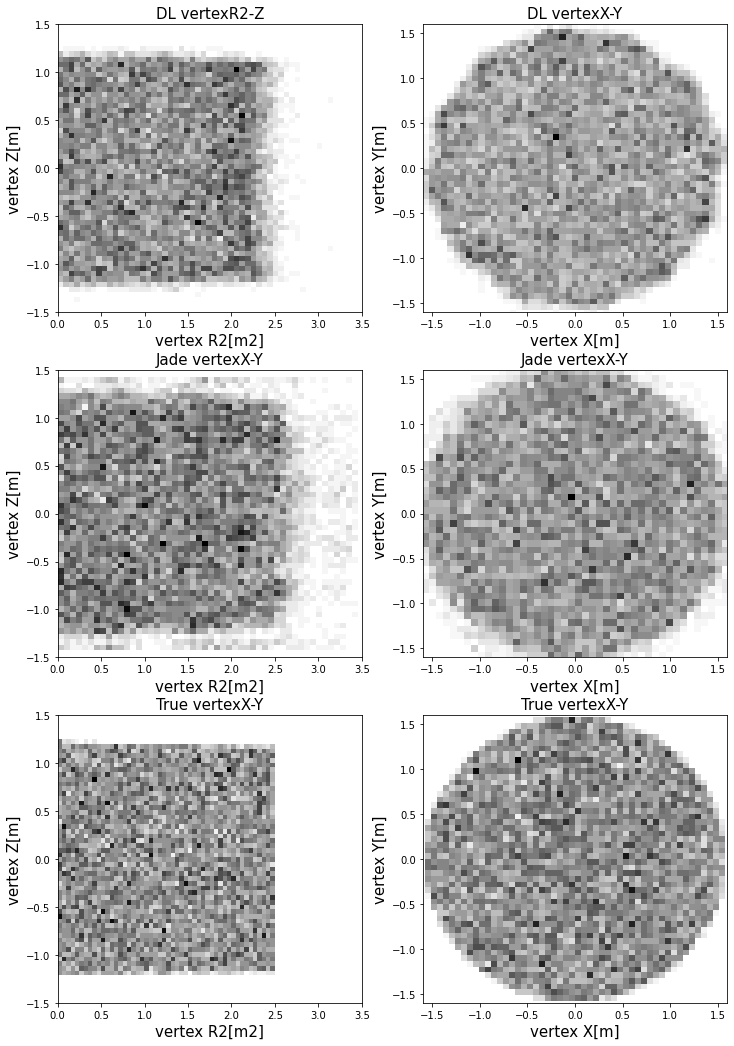

In [8]:
orig_map=plt.cm.get_cmap('gray')
  
# reversing the original colormap using reversed() function
r_map = orig_map.reversed()


plt.rcParams['figure.figsize'] = (12, 18)
plt.subplot(3,2,1)
plt.hist2d((pred[:,0]**2+pred[:,1]** 2),pred[:,2], bins = 50,cmap=r_map)
plt.title('DL vertexR2-Z',fontsize = 15)
plt.xlim([0,3.5])
plt.ylim([-1.5,1.5])
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel("vertex R2[m2]", fontsize=15)
plt.ylabel("vertex Z[m]", fontsize=15)

plt.subplot(3,2,3)
plt.hist2d((jade[:,0]**2+jade[:,1]** 2),jade[:,2], bins = 50,cmap=r_map)
plt.title('Jade vertexX-Y',fontsize = 15)
plt.xlim([0,3.5])
plt.ylim([-1.5,1.5])
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel("vertex R2[m2]", fontsize=15)
plt.ylabel("vertex Z[m]", fontsize=15)

plt.subplot(3,2,5)
plt.hist2d((label[:,0]**2+label[:,1]** 2),label[:,2], bins = 50,cmap=r_map)
plt.title('True vertexX-Y',fontsize = 15)
plt.xlim([0,3.5])
plt.ylim([-1.5,1.5])
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel("vertex R2[m2]", fontsize=15)
plt.ylabel("vertex Z[m]", fontsize=15)


plt.subplot(3,2,2)
plt.hist2d(pred[:,0],pred[:,1], bins = 50,cmap=r_map)
plt.title('DL vertexX-Y',fontsize = 15)
plt.xlim([-1.6,1.6])
plt.ylim([-1.6,1.6])
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel("vertex X[m]", fontsize=15)
plt.ylabel("vertex Y[m]", fontsize=15)


plt.subplot(3,2,4)
plt.hist2d(jade[:,0],jade[:,1], bins = 50,cmap=r_map)
plt.title('Jade vertexX-Y',fontsize = 15)
plt.xlim([-1.6,1.6])
plt.ylim([-1.6,1.6])
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel("vertex X[m]", fontsize=15)
plt.ylabel("vertex Y[m]", fontsize=15)

plt.subplot(3,2,6)
plt.hist2d(label[:,0],label[:,1], bins = 50,cmap=r_map)
plt.title('True vertexX-Y',fontsize = 15)
plt.xlim([-1.6,1.6])
plt.ylim([-1.6,1.6])
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel("vertex X[m]", fontsize=15)
plt.ylabel("vertex Y[m]", fontsize=15)



plt.show()

IndexError: index 3 is out of bounds for axis 1 with size 3

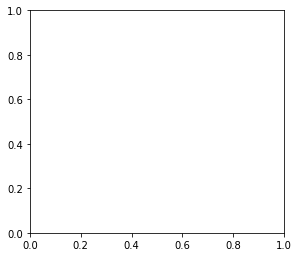

In [9]:
energy_list = [1,2,3,4,5,6,7,8,9,10]
# energy_list=[1]
for a in energy_list:
    plt.rcParams['figure.figsize'] = (10, 9)
    plt.subplot(2,2,1)
    ######### jsns2 geo
    plt.hist(pred[:,0][pred[:,3] == a], bins = 100, range = [-2,2], color= 'r', alpha = 0.5, density = True, histtype = 'step',label = 'pred')
    plt.hist(label[:,0][label[:,3] == a], bins = 100, range = [-2,2], color= 'b', alpha = 0.5, density = True, histtype = 'step',label = 'target')

    plt.hist(jade[:,0][label[:,3] == a], bins = 100, range = [-2,2], color= 'g', alpha = 0.5, density = True, histtype = 'step',label = 'jade')

    # plt.hist(jade[:,0], bins = 100, range = [-2,2], color= 'g', alpha = 0.5, density = True, histtype = 'step',label = 'jade')
    plt.title('vertexX',fontsize = 25)
    # plt.xlim([-0.0005,0])
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)
    plt.xlabel("m", fontsize=15, loc='right')
    plt.legend()


    plt.subplot(2,2,2)

    plt.hist(pred[:,1][pred[:,3] == a], bins = 100, range = [-2,2], color= 'r', alpha = 0.5, density = True, histtype = 'step',label = 'pred')
    plt.hist(label[:,1][label[:,3] == a], bins = 100, range = [-2,2], color= 'b', alpha = 0.5, density = True, histtype = 'step',label = 'target')
    plt.hist(jade[:,1][label[:,3] == a], bins = 100, range = [-2,2], color= 'g', alpha = 0.5, density = True, histtype = 'step',label = 'jade')

    plt.title('vertexY',fontsize = 25)
    # plt.xlim([-0.00016,0])
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)
    plt.xlabel("m", fontsize=15, loc='right')
    plt.legend()

    plt.subplot(2,2,3)
    plt.hist(pred[:,2][pred[:,3] == a], bins = 100, range = [-1.5,1.5], color= 'r', alpha = 0.5, density = True, histtype = 'step',label = 'pred')
    plt.hist(label[:,2][label[:,3] == a], bins = 100, range = [-1.5,1.5], color= 'b', alpha = 0.5, density = True, histtype = 'step',label = 'target')
    plt.hist(jade[:,2][label[:,3] == a], bins = 100, range = [-2,2], color= 'g', alpha = 0.5, density = True, histtype = 'step',label = 'jade')
    plt.title('vertexZ',fontsize = 25)
    # plt.xlim([-3,3])
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)
    plt.xlabel("m", fontsize=15, loc='right')
    plt.legend()


    plt.subplot(2,2,4)
    plt.hist((pred[:,0][pred[:,3]== a]**2+pred[:,1][pred[:,3]== a]** 2), bins = 100, range = [0,3], color= 'r', alpha = 0.5, density = True, histtype = 'step',label = 'pred')
    plt.hist((label[:,0][label[:,3] == a]**2+label[:,1][label[:,3] == a]**2), bins = 100, range = [0,3], color= 'b', alpha = 0.5, density = True, histtype = 'step',label = 'target')
    plt.hist((jade[:,0][label[:,3] == a]**2+jade[:,1][label[:,3] == a]**2), bins = 100, range = [0,3], color= 'g', alpha = 0.5, density = True, histtype = 'step',label = 'jade')

    plt.title('vertexR\u00b2',fontsize = 25)
    # plt.xlim([-1,6])
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)
    plt.xlabel("m", fontsize=15, loc='right')
    plt.legend()
    plt.show()


/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in true_divide
  from ipykernel import kernelapp as app
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:38: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:60: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:81: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:104: RuntimeWarning: divide by zero encountered in true_divide
/users/yewzzang/.local/lib/python3.7/site-packages/ipykernel_launcher.py:126: RuntimeWarning: divide by zero encountered in true_divide


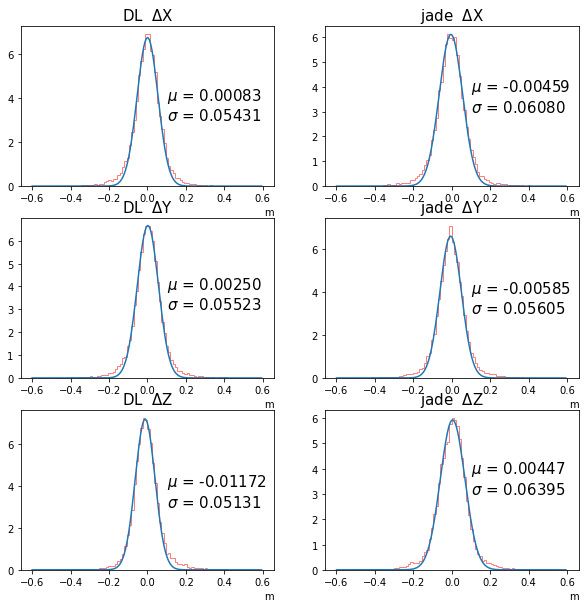

In [10]:

ran = 0.6
def gaussian(x, A, mu, sigma):
    f = A*np.exp(-(x-mu)**2/2./sigma**2)
    return f
plt.rcParams['figure.figsize'] = (10, 10)
plt.subplot(3,2,1)
tmp_hist = plt.hist(pred[:,0] - label[:,0],bins = 100, range = [-ran,ran], color= 'r', alpha = 0.5, density = True, histtype = 'step')
hist_N = tmp_hist[0]
hist_x = []
for i in range(len(tmp_hist[1])-1):
    tmp = tmp_hist[1]
    hist_x.append((tmp[i] + tmp[i+1])/2.)
hist_x = np.array(hist_x)

popt, pcov = curve_fit(gaussian, hist_x, hist_N, p0=[10,0.01,0.15], sigma=1./np.sqrt(hist_N), absolute_sigma=True)
hist_xx = np.arange(-ran,ran,0.6/100.)
##A = popt[0]; mu = popt[1]; sigma = popt[2]
plt.title('DL  ' + r'$\Delta$X',fontsize = 15)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)

plt.xlabel("m", fontsize=10, loc='right')
plt.text(0.10,3,r'$\mu$ = ' +f"{popt[1]:.5f}"+'\n$\sigma$ = ' +f"{np.abs(popt[2]):.5f}",fontsize=15)
plt.plot(hist_xx, gaussian(hist_xx,*popt),label='fit')



plt.subplot(3,2,3)

tmp_hist = plt.hist(pred[:,1] - label[:,1],bins = 100, range = [-ran,ran], color= 'r', alpha = 0.5, density = True, histtype = 'step')
hist_N = tmp_hist[0]
hist_x = []
for i in range(len(tmp_hist[1])-1):
    tmp = tmp_hist[1]
    hist_x.append((tmp[i] + tmp[i+1])/2.)
hist_x = np.array(hist_x)

popt, pcov = curve_fit(gaussian, hist_x, hist_N, p0=[10,0.01,0.15], sigma=1./np.sqrt(hist_N), absolute_sigma=True)
hist_xx = np.arange(-ran,ran,0.6/100.)
##A = popt[0]; mu = popt[1]; sigma = popt[2]
plt.title('DL  ' + r'$\Delta$Y',fontsize = 15)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel("m", fontsize=10, loc='right')
plt.text(0.10,3,r'$\mu$ = ' +f"{popt[1]:.5f}"+'\n$\sigma$ = ' +f"{np.abs(popt[2]):.5f}",fontsize=15)

plt.plot(hist_xx, gaussian(hist_xx,*popt),label='fit')



plt.subplot(3,2,5)
tmp_hist = plt.hist(pred[:,2] - label[:,2],bins = 100, range = [-ran,ran], color= 'r', alpha = 0.5, density = True, histtype = 'step')
hist_N = tmp_hist[0]
hist_x = []
for i in range(len(tmp_hist[1])-1):
    tmp = tmp_hist[1]
    hist_x.append((tmp[i] + tmp[i+1])/2.)
hist_x = np.array(hist_x)

popt, pcov = curve_fit(gaussian, hist_x, hist_N, p0=[10,0.01,0.15], sigma=1./np.sqrt(hist_N), absolute_sigma=True)
hist_xx = np.arange(-ran,ran,0.6/100.)
##A = popt[0]; mu = popt[1]; sigma = popt[2]
plt.title('DL  ' + r'$\Delta$Z',fontsize = 15)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel("m", fontsize=10, loc='right')
plt.text(0.10,3,r'$\mu$ = ' +f"{popt[1]:.5f}"+'\n$\sigma$ = ' +f"{np.abs(popt[2]):.5f}",fontsize=15)

plt.plot(hist_xx, gaussian(hist_xx,*popt),label='fit')


plt.subplot(3,2,2)
tmp_hist = plt.hist(jade[:,0] - label[:,0],bins = 100, range = [-ran,ran], color= 'r', alpha = 0.5, density = True, histtype = 'step')
hist_N = tmp_hist[0]
hist_x = []
for i in range(len(tmp_hist[1])-1):
    tmp = tmp_hist[1]
    hist_x.append((tmp[i] + tmp[i+1])/2.)
hist_x = np.array(hist_x)

popt, pcov = curve_fit(gaussian, hist_x, hist_N, p0=[10,0.01,0.15], sigma=1./np.sqrt(hist_N), absolute_sigma=True)
hist_xx = np.arange(-ran,ran,0.6/100.)
##A = popt[0]; mu = popt[1]; sigma = popt[2]
plt.title('jade  ' + r'$\Delta$X',fontsize = 15)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)

plt.xlabel("m", fontsize=10, loc='right')
plt.text(0.10,3,r'$\mu$ = ' +f"{popt[1]:.5f}"+'\n$\sigma$ = ' +f"{np.abs(popt[2]):.5f}",fontsize=15)
plt.plot(hist_xx, gaussian(hist_xx,*popt),label='fit')



plt.subplot(3,2,4)

tmp_hist = plt.hist(jade[:,1] - label[:,1],bins = 100, range = [-ran,ran], color= 'r', alpha = 0.5, density = True, histtype = 'step')
hist_N = tmp_hist[0]
hist_x = []
for i in range(len(tmp_hist[1])-1):
    tmp = tmp_hist[1]
    hist_x.append((tmp[i] + tmp[i+1])/2.)
hist_x = np.array(hist_x)

popt, pcov = curve_fit(gaussian, hist_x, hist_N, p0=[10,0.01,0.15], sigma=1./np.sqrt(hist_N), absolute_sigma=True)
hist_xx = np.arange(-ran,ran,0.6/100.)
##A = popt[0]; mu = popt[1]; sigma = popt[2]
plt.title('jade  ' + r'$\Delta$Y',fontsize = 15)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel("m", fontsize=10, loc='right')
plt.text(0.10,3,r'$\mu$ = ' +f"{popt[1]:.5f}"+'\n$\sigma$ = ' +f"{np.abs(popt[2]):.5f}",fontsize=15)

plt.plot(hist_xx, gaussian(hist_xx,*popt),label='fit')



plt.subplot(3,2,6)
tmp_hist = plt.hist(jade[:,2] - label[:,2],bins = 100, range = [-ran,ran], color= 'r', alpha = 0.5, density = True, histtype = 'step')
hist_N = tmp_hist[0]
hist_x = []
for i in range(len(tmp_hist[1])-1):
    tmp = tmp_hist[1]
    hist_x.append((tmp[i] + tmp[i+1])/2.)
hist_x = np.array(hist_x)

popt, pcov = curve_fit(gaussian, hist_x, hist_N, p0=[10,0.01,0.15], sigma=1./np.sqrt(hist_N), absolute_sigma=True)
hist_xx = np.arange(-ran, ran,0.6/100.)
##A = popt[0]; mu = popt[1]; sigma = popt[2]
plt.title('jade  ' + r'$\Delta$Z',fontsize = 15)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel("m", fontsize=10, loc='right')
plt.text(0.10,3,r'$\mu$ = ' +f"{popt[1]:.5f}"+'\n$\sigma$ = ' +f"{np.abs(popt[2]):.5f}",fontsize=15)

plt.plot(hist_xx, gaussian(hist_xx,*popt),label='fit')

plt.show()



IndexError: index 3 is out of bounds for axis 1 with size 3

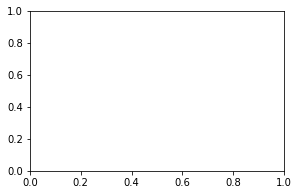

In [11]:

for a in energy_list:
    ran = 0.6
    def gaussian(x, A, mu, sigma):
        f = A*np.exp(-(x-mu)**2/2./sigma**2)
        return f
    plt.rcParams['figure.figsize'] = (10, 10)
    plt.subplot(3,2,1)
    tmp_hist = plt.hist(pred[:,0][label[:,3] == a] - label[:,0][label[:,3] == a],bins = 100, range = [-ran,ran], color= 'r', alpha = 0.5, density = True, histtype = 'step')
    hist_N = tmp_hist[0]
    hist_x = []
    for i in range(len(tmp_hist[1])-1):
        tmp = tmp_hist[1]
        hist_x.append((tmp[i] + tmp[i+1])/2.)
    hist_x = np.array(hist_x)

    popt, pcov = curve_fit(gaussian, hist_x, hist_N, p0=[10,0.01,0.15], sigma=1./np.sqrt(hist_N), absolute_sigma=True)
    hist_xx = np.arange(-ran,ran,0.6/100.)
    ##A = popt[0]; mu = popt[1]; sigma = popt[2]
    plt.title('DL  ' + r'$\Delta$X',fontsize = 15)
    plt.xticks(fontsize = 10)
    plt.yticks(fontsize = 10)

    plt.xlabel("m", fontsize=10, loc='right')
    plt.text(0.10,3,r'$\mu$ = ' +f"{popt[1]:.5f}"+'\n$\sigma$ = ' +f"{np.abs(popt[2]):.5f}",fontsize=15)
    plt.plot(hist_xx, gaussian(hist_xx,*popt),label='fit')



    plt.subplot(3,2,3)

    tmp_hist = plt.hist(pred[:,1][label[:,3] == a] - label[:,1][label[:,3] == a],bins = 100, range = [-ran,ran], color= 'r', alpha = 0.5, density = True, histtype = 'step')
    hist_N = tmp_hist[0]
    hist_x = []
    for i in range(len(tmp_hist[1])-1):
        tmp = tmp_hist[1]
        hist_x.append((tmp[i] + tmp[i+1])/2.)
    hist_x = np.array(hist_x)

    popt, pcov = curve_fit(gaussian, hist_x, hist_N, p0=[10,0.01,0.15], sigma=1./np.sqrt(hist_N), absolute_sigma=True)
    hist_xx = np.arange(-ran,ran,0.6/100.)
    ##A = popt[0]; mu = popt[1]; sigma = popt[2]
    plt.title('DL  ' + r'$\Delta$Y',fontsize = 15)
    plt.xticks(fontsize = 10)
    plt.yticks(fontsize = 10)
    plt.xlabel("m", fontsize=10, loc='right')
    plt.text(0.10,3,r'$\mu$ = ' +f"{popt[1]:.5f}"+'\n$\sigma$ = ' +f"{np.abs(popt[2]):.5f}",fontsize=15)

    plt.plot(hist_xx, gaussian(hist_xx,*popt),label='fit')



    plt.subplot(3,2,5)
    tmp_hist = plt.hist(pred[:,2][label[:,3] == a] - label[:,2][label[:,3] == a],bins = 100, range = [-ran,ran], color= 'r', alpha = 0.5, density = True, histtype = 'step')
    hist_N = tmp_hist[0]
    hist_x = []
    for i in range(len(tmp_hist[1])-1):
        tmp = tmp_hist[1]
        hist_x.append((tmp[i] + tmp[i+1])/2.)
    hist_x = np.array(hist_x)

    popt, pcov = curve_fit(gaussian, hist_x, hist_N, p0=[10,0.01,0.15], sigma=1./np.sqrt(hist_N), absolute_sigma=True)
    hist_xx = np.arange(-ran,ran,0.6/100.)
    ##A = popt[0]; mu = popt[1]; sigma = popt[2]
    plt.title('DL  ' + r'$\Delta$Z',fontsize = 15)
    plt.xticks(fontsize = 10)
    plt.yticks(fontsize = 10)
    plt.xlabel("m", fontsize=10, loc='right')
    plt.text(0.10,3,r'$\mu$ = ' +f"{popt[1]:.5f}"+'\n$\sigma$ = ' +f"{np.abs(popt[2]):.5f}",fontsize=15)

    plt.plot(hist_xx, gaussian(hist_xx,*popt),label='fit')


    plt.subplot(3,2,2)
    tmp_hist = plt.hist(jade[:,0][label[:,3] == a] - label[:,0][label[:,3] == a],bins = 100, range = [-ran,ran], color= 'r', alpha = 0.5, density = True, histtype = 'step')
    hist_N = tmp_hist[0]
    hist_x = []
    for i in range(len(tmp_hist[1])-1):
        tmp = tmp_hist[1]
        hist_x.append((tmp[i] + tmp[i+1])/2.)
    hist_x = np.array(hist_x)

    popt, pcov = curve_fit(gaussian, hist_x, hist_N, p0=[10,0.01,0.15], sigma=1./np.sqrt(hist_N), absolute_sigma=True)
    hist_xx = np.arange(-ran,ran,0.6/100.)
    ##A = popt[0]; mu = popt[1]; sigma = popt[2]
    plt.title('jade  ' + r'$\Delta$X',fontsize = 15)
    plt.xticks(fontsize = 10)
    plt.yticks(fontsize = 10)

    plt.xlabel("m", fontsize=10, loc='right')
    plt.text(0.10,3,r'$\mu$ = ' +f"{popt[1]:.5f}"+'\n$\sigma$ = ' +f"{np.abs(popt[2]):.5f}",fontsize=15)
    plt.plot(hist_xx, gaussian(hist_xx,*popt),label='fit')



    plt.subplot(3,2,4)

    tmp_hist = plt.hist(jade[:,1][label[:,3] == a] - label[:,1][label[:,3] == a],bins = 100, range = [-ran,ran], color= 'r', alpha = 0.5, density = True, histtype = 'step')
    hist_N = tmp_hist[0]
    hist_x = []
    for i in range(len(tmp_hist[1])-1):
        tmp = tmp_hist[1]
        hist_x.append((tmp[i] + tmp[i+1])/2.)
    hist_x = np.array(hist_x)

    popt, pcov = curve_fit(gaussian, hist_x, hist_N, p0=[10,0.01,0.15], sigma=1./np.sqrt(hist_N), absolute_sigma=True)
    hist_xx = np.arange(-ran,ran,0.6/100.)
    ##A = popt[0]; mu = popt[1]; sigma = popt[2]
    plt.title('jade  ' + r'$\Delta$Y',fontsize = 15)
    plt.xticks(fontsize = 10)
    plt.yticks(fontsize = 10)
    plt.xlabel("m", fontsize=10, loc='right')
    plt.text(0.10,3,r'$\mu$ = ' +f"{popt[1]:.5f}"+'\n$\sigma$ = ' +f"{np.abs(popt[2]):.5f}",fontsize=15)

    plt.plot(hist_xx, gaussian(hist_xx,*popt),label='fit')



    plt.subplot(3,2,6)
    tmp_hist = plt.hist(jade[:,2][label[:,3] == a] - label[:,2][label[:,3] == a],bins = 100, range = [-ran,ran], color= 'r', alpha = 0.5, density = True, histtype = 'step')
    hist_N = tmp_hist[0]
    hist_x = []
    for i in range(len(tmp_hist[1])-1):
        tmp = tmp_hist[1]
        hist_x.append((tmp[i] + tmp[i+1])/2.)
    hist_x = np.array(hist_x)

    popt, pcov = curve_fit(gaussian, hist_x, hist_N, p0=[10,0.01,0.15], sigma=1./np.sqrt(hist_N), absolute_sigma=True)
    hist_xx = np.arange(-ran, ran,0.6/100.)
    ##A = popt[0]; mu = popt[1]; sigma = popt[2]
    plt.title('jade  ' + r'$\Delta$Z',fontsize = 15)
    plt.xticks(fontsize = 10)
    plt.yticks(fontsize = 10)
    plt.xlabel("m", fontsize=10, loc='right')
    plt.text(0.10,3,r'$\mu$ = ' +f"{popt[1]:.5f}"+'\n$\sigma$ = ' +f"{np.abs(popt[2]):.5f}",fontsize=15)

    plt.plot(hist_xx, gaussian(hist_xx,*popt),label='fit')
    print('Energy = ' + str(a))
    
    
    plt.show()



In [12]:
re_mu_x = []
re_mu_y = []
re_mu_z = []

re_si_x = []
re_si_y = []
re_si_z = []
for a in energy_list:
    ran = 0.6
    def gaussian(x, A, mu, sigma):
        f = A*np.exp(-(x-mu)**2/2./sigma**2)
        return f

    for vtx in range(3):
        tmp_hist = plt.hist(pred[:,vtx][label[:,3] == a] - label[:,vtx][label[:,3] == a],bins = 100, range = [-ran,ran], color= 'r', alpha = 0.5, density = True, histtype = 'step')
        hist_N = tmp_hist[0]
        hist_x = []
        for i in range(len(tmp_hist[1])-1):
            tmp = tmp_hist[1]
            hist_x.append((tmp[i] + tmp[i+1])/2.)
        hist_x = np.array(hist_x)

        popt, pcov = curve_fit(gaussian, hist_x, hist_N, p0=[10,0.01,0.15], sigma=1./np.sqrt(hist_N), absolute_sigma=True)
        if vtx == 0:
            re_mu_x.append(popt[1])
            re_si_x.append(popt[2])
        if vtx == 1:
            re_mu_y.append(popt[1])
            re_si_y.append(popt[2])
        if vtx == 2:
            re_mu_z.append(popt[1])
            re_si_z.append(popt[2])
        

IndexError: index 3 is out of bounds for axis 1 with size 3

In [13]:
ja_mu_x = []
ja_mu_y = []
ja_mu_z = []

ja_si_x = []
ja_si_y = []
ja_si_z = []
for a in energy_list:
    ran = 0.6
    def gaussian(x, A, mu, sigma):
        f = A*np.exp(-(x-mu)**2/2./sigma**2)
        return f

    for vtx in range(3):
        tmp_hist = plt.hist(jade[:,vtx][label[:,3] == a] - label[:,vtx][label[:,3] == a],bins = 100, range = [-ran,ran], color= 'r', alpha = 0.5, density = True, histtype = 'step')
        hist_N = tmp_hist[0]
        hist_x = []
        for i in range(len(tmp_hist[1])-1):
            tmp = tmp_hist[1]
            hist_x.append((tmp[i] + tmp[i+1])/2.)
        hist_x = np.array(hist_x)

        popt, pcov = curve_fit(gaussian, hist_x, hist_N, p0=[10,0.01,0.15], sigma=1./np.sqrt(hist_N), absolute_sigma=True)
        if vtx == 0:
            ja_mu_x.append(popt[1])
            ja_si_x.append(popt[2])
        if vtx == 1:
            ja_mu_y.append(popt[1])
            ja_si_y.append(popt[2])
        if vtx == 2:
            ja_mu_z.append(popt[1])
            ja_si_z.append(popt[2])
        

IndexError: index 3 is out of bounds for axis 1 with size 3

ValueError: x and y must have same first dimension, but have shapes (10,) and (0,)

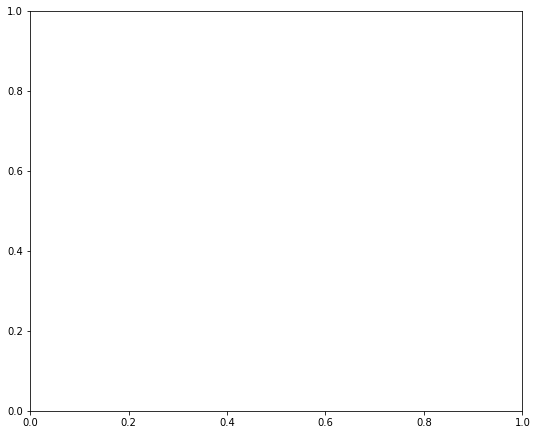

In [14]:
# plt.rcParams['figure.figsize'] = (7, 7)
plt.rcParams['figure.figsize'] = (30, 25)
plt.subplot(3,3,1)
plt.plot(energy_list,(ja_mu_x),'or',label = 'Jade x')
plt.plot(energy_list,(re_mu_x),'ob',label = 'DL x')
# plt.errorbar(energy_list,ja_mu_y,yerr=ja_si_y)
# plt.errorbar(energy_list,ja_mu_z,yerr=ja_si_z)
plt.title('vertex X mu',fontsize = 25)
plt.xlabel('Energy',fontsize = 25)
plt.ylabel('mu',fontsize = 25)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.legend(fontsize = 20)
plt.ylim([-0.02,0.02])
plt.legend(fontsize=20)

plt.subplot(3,3,4)
plt.rcParams['figure.figsize'] = (7, 7)
plt.plot(energy_list,(ja_mu_y),'or',label = 'Jade x')
plt.plot(energy_list,(re_mu_y),'ob',label = 'DL x')
# plt.errorbar(energy_list,ja_mu_y,yerr=ja_si_y)
# plt.errorbar(energy_list,ja_mu_z,yerr=ja_si_z)
plt.title('vertex Y mu',fontsize = 25)
plt.xlabel('Energy',fontsize = 25)
plt.ylabel('mu',fontsize = 25)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.legend(fontsize = 20)
plt.ylim([-0.02,0.02])
plt.legend(fontsize=20)

plt.subplot(3,3,7)
plt.rcParams['figure.figsize'] = (7, 7)
plt.plot(energy_list,(ja_mu_z),'or',label = 'Jade x')
plt.plot(energy_list,(re_mu_z),'ob',label = 'DL x')
# plt.errorbar(energy_list,ja_mu_y,yerr=ja_si_y)
# plt.errorbar(energy_list,ja_mu_z,yerr=ja_si_z)
plt.title('vertex Z mu',fontsize = 25)
plt.xlabel('Energy',fontsize = 25)
plt.ylabel('mu',fontsize = 25)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.legend(fontsize = 20)
plt.ylim([-0.02,0.02])
plt.legend(fontsize=20)



plt.subplot(3,3,2)
plt.plot(energy_list,np.abs(ja_si_x),'or',label = 'Jade x')
plt.plot(energy_list,np.abs(re_si_x),'ob',label = 'DL x')
# plt.errorbar(energy_list,ja_mu_y,yerr=ja_si_y)
# plt.errorbar(energy_list,ja_mu_z,yerr=ja_si_z)
plt.title('vertex X sigma',fontsize = 25)
plt.xlabel('Energy',fontsize = 25)
plt.ylabel('sigma',fontsize = 25)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.legend(fontsize = 20)
# plt.ylim([-0.02,0.02])
plt.legend(fontsize=20)

plt.subplot(3,3,5)
plt.plot(energy_list,np.abs(ja_si_y),'or',label = 'Jade x')
plt.plot(energy_list,np.abs(re_si_y),'ob',label = 'DL x')
# plt.errorbar(energy_list,ja_mu_y,yerr=ja_si_y)
# plt.errorbar(energy_list,ja_mu_z,yerr=ja_si_z)
plt.title('vertex Y sigma',fontsize = 25)
plt.xlabel('Energy',fontsize = 25)
plt.ylabel('sigma',fontsize = 25)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.legend(fontsize = 20)
# plt.ylim([-0.02,0.02])
plt.legend(fontsize=20)


plt.subplot(3,3,8)
plt.plot(energy_list,np.abs(ja_si_z),'or',label = 'Jade x')
plt.plot(energy_list,np.abs(re_si_z),'ob',label = 'DL x')
# plt.errorbar(energy_list,ja_mu_y,yerr=ja_si_y)
# plt.errorbar(energy_list,ja_mu_z,yerr=ja_si_z)
plt.title('vertex Z sigma',fontsize = 25)
plt.xlabel('Energy',fontsize = 25)
plt.ylabel('sigma',fontsize = 25)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.legend(fontsize = 20)
# plt.ylim([-0.02,0.02])
plt.legend(fontsize=20)


plt.subplot(3,3,3)
plt.errorbar(energy_list,ja_mu_x,yerr=ja_si_x,label = 'Jade x')
plt.errorbar(energy_list,re_mu_x,yerr=re_si_x,label = 'DL x')
# plt.errorbar(energy_list,ja_mu_y,yerr=ja_si_y)
# plt.errorbar(energy_list,ja_mu_z,yerr=ja_si_z)
plt.title('vertex X mu & sigma',fontsize = 25)
plt.xlabel('Energy',fontsize = 25)
plt.ylabel('mu',fontsize = 25)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.legend(fontsize = 20)
plt.ylim([-0.15,0.15])
plt.legend(fontsize=20)

plt.subplot(3,3,6)
plt.errorbar(energy_list,ja_mu_y,yerr=ja_si_y,label = 'Jade y')
plt.errorbar(energy_list,re_mu_y,yerr=re_si_y,label = 'DL y')
# plt.errorbar(energy_list,ja_mu_y,yerr=ja_si_y)
# plt.errorbar(energy_list,ja_mu_z,yerr=ja_si_z)
plt.title('vertex Y mu & sigma',fontsize = 25)
plt.xlabel('Energy',fontsize = 25)
plt.ylabel('mu',fontsize = 25)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.legend(fontsize = 20)
plt.ylim([-0.15,0.15])
plt.legend(fontsize=20)

plt.subplot(3,3,9)
plt.errorbar(energy_list,ja_mu_z,yerr=ja_si_z,label = 'Jade z')
plt.errorbar(energy_list,re_mu_z,yerr=re_si_z,label = 'DL z')
# plt.errorbar(energy_list,ja_mu_y,yerr=ja_si_y)
# plt.errorbar(energy_list,ja_mu_z,yerr=ja_si_z)
plt.title('vertex Z mu & sigma',fontsize = 25)
plt.xlabel('Energy',fontsize = 25)
plt.ylabel('mu',fontsize = 25)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.legend(fontsize = 20)
plt.ylim([-0.15,0.15])
plt.legend(fontsize=20)
plt.show()



IndexError: index 3 is out of bounds for axis 1 with size 3

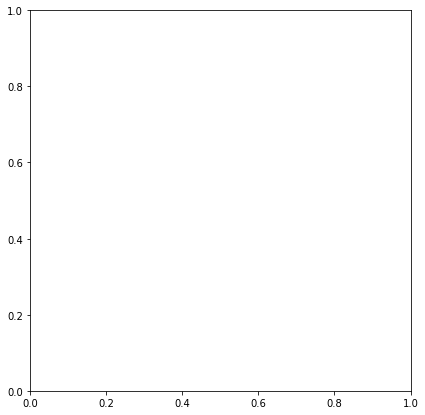

In [15]:
plt.rcParams['figure.figsize'] = (15, 7)
plt.subplot(1,2,1)
tmp_hist = plt.hist(label[:,3]-pred[:,3],bins = 100, range = [-4,4], color= 'r', alpha = 0.5, density = True, histtype = 'step')
hist_N = tmp_hist[0]
hist_x = []
for i in range(len(tmp_hist[1])-1):
    tmp = tmp_hist[1]
    hist_x.append((tmp[i] + tmp[i+1])/2.)
hist_x = np.array(hist_x)

popt, pcov = curve_fit(gaussian, hist_x, hist_N, p0=[10,0.01,0.15], sigma=1./np.sqrt(hist_N), absolute_sigma=True)
hist_xx = np.arange(-4,4,0.6/100.)
##A = popt[0]; mu = popt[1]; sigma = popt[2]
plt.title('DL  ' + r'$\Delta$E',fontsize = 15)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel("m", fontsize=10, loc='right')
plt.text(0.5,1,r'$\mu$ = ' +f"{popt[1]:.5f}"+'\n$\sigma$ = ' +f"{np.abs(popt[2]):.5f}",fontsize=25)
plt.plot(hist_xx, gaussian(hist_xx,*popt),label='fit')

plt.subplot(1,2,2)
tmp_hist = plt.hist(label[:,3]-jade[:,3],bins = 100, range = [-4,4], color= 'r', alpha = 0.5, density = True, histtype = 'step')
hist_N = tmp_hist[0]
hist_x = []
for i in range(len(tmp_hist[1])-1):
    tmp = tmp_hist[1]
    hist_x.append((tmp[i] + tmp[i+1])/2.)
hist_x = np.array(hist_x)

popt, pcov = curve_fit(gaussian, hist_x, hist_N, p0=[10,0.01,0.15], sigma=1./np.sqrt(hist_N), absolute_sigma=True)
hist_xx = np.arange(-4,4,0.6/100.)
##A = popt[0]; mu = popt[1]; sigma = popt[2]
plt.title('jade  ' + r'$\Delta$E',fontsize = 15)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel("m", fontsize=10, loc='right')
plt.text(0.5,1,r'$\mu$ = ' +f"{popt[1]:.5f}"+'\n$\sigma$ = ' +f"{np.abs(popt[2]):.5f}",fontsize=25)

plt.plot(hist_xx, gaussian(hist_xx,*popt),label='fit')
plt.show()
# for i in range(10):
#     plt.hist(pred[:,3][label[:,3]==(i+1)],bins=50, color= 'r', alpha = 0.5, density = True, histtype = 'step')
#     plt.hist(jade[:,3][label[:,3]==(i+1)],bins=50, color= 'b', alpha = 0.5, density = True, histtype = 'step')

   

In [ ]:
# plt.subplot(4,1,1)
R2_label = np.power(label[:,0],2)+np.power(label[:,1],2)
R2_pred = np.power(pred[:,0],2)+np.power(pred[:,1],2)
Z_label = label[:,2]
Z_pred = pred[:,2]
R2_jade = np.power(jade[:,0],2)+np.power(jade[:,1],2)
Z_jade = jade[:,2]

In [ ]:
ZZ = [8,0.4,-0.4,-8]

RR = [0,0.7,1.4,20]

In [ ]:
for ver in range(3):
##################
    plt.rcParams['figure.figsize'] = (10, 10)
    for k in range(3):
        for j in range(3):


            plt.subplot(3,3,3*k+(j+1))

            tmp_hist = plt.hist(pred[:,ver][(Z_label>ZZ[k+1]) & (Z_label<ZZ[k]) & (R2_label>RR[j]) & (R2_label<RR[j+1])] - label[:,ver][(Z_label>ZZ[k+1]) & (Z_label<ZZ[k]) & (R2_label>RR[j]) & (R2_label<RR[j+1])],bins = 100, range = [-0.3,0.3], color= 'r', alpha = 0.3, density = True, histtype = 'step')
            tmp_hist_jade = plt.hist(jade[:,ver][(Z_label>ZZ[k+1]) & (Z_label<ZZ[k]) & (R2_label>RR[j]) & (R2_label<RR[j+1])] - label[:,ver][(Z_label>ZZ[k+1]) & (Z_label<ZZ[k]) & (R2_label>RR[j]) & (R2_label<RR[j+1])],bins = 100, range = [-0.3,0.3], color= 'g', alpha = 0.3, density = True, histtype = 'step')

            hist_N = tmp_hist[0]
            hist_x = []

            hist_N_jade = tmp_hist_jade[0]
            hist_x_jade = []

            for i in range(len(tmp_hist[1])-1):
                tmp = tmp_hist[1]
                hist_x.append((tmp[i] + tmp[i+1])/2.)
            hist_x = np.array(hist_x)

            for i in range(len(tmp_hist_jade [1])-1):
                tmp_jade  = tmp_hist_jade [1]
                hist_x_jade .append((tmp_jade [i] + tmp_jade [i+1])/2.)
            hist_x_jade  = np.array(hist_x_jade )

            popt, pcov = curve_fit(gaussian, hist_x, hist_N, p0=[10,0.01,0.15], sigma=1./np.sqrt(hist_N), absolute_sigma=True)
            hist_xx = np.arange(-0.5, 0.5,0.6/100.)


            popt_jade, pcov_jade = curve_fit(gaussian, hist_x_jade, hist_N_jade, p0=[10,0.01,0.15], sigma=1./np.sqrt(hist_N_jade), absolute_sigma=True)
            hist_xx_jade = np.arange(-0.5, 0.5,0.6/100.)


            ##A = popt[0]; mu = popt[1]; sigma = popt[2]
        #         plt.title(r'$\Delta$X',fontsize = 25)
            plt.xticks(fontsize = 5)
            plt.yticks(fontsize = 5)

            plt.xlabel("m", fontsize=5, loc='right')
        #         plt.text(-0.3,15,'GNN\n'+r'$\mu$ = ' +f"{popt[1]:.5f}"+'\n$\sigma$ = ' +f"{np.abs(popt[2]):.5f}",fontsize=10)
            plt.plot(hist_xx, gaussian(hist_xx,*popt),label='GNN\n'+r'$\mu$ = ' +f"{popt[1]:.5f}"+'  $\sigma$ = ' +f"{np.abs(popt[2]):.5f}")


        #         plt.text(0,15,'jade\n'+r'$\mu$ = ' +f"{popt_jade[1]:.5f}"+'\n$\sigma$ = ' +f"{np.abs(popt_jade[2]):.5f}",fontsize=10)
            plt.plot(hist_xx_jade, gaussian(hist_xx_jade,*popt_jade),label='jade\n'+r'$\mu$ = ' +f"{popt_jade[1]:.5f}"+'  $\sigma$ = ' +f"{np.abs(popt_jade[2]):.5f}")
        #         plt.vlines(0,0,15,colors='red')
            plt.grid()
            # plt.ylim([0,20])        
            plt.legend(fontsize = 5)
    plt.show()

In [ ]:


Z_re_mu_z_up = []
Z_re_mu_z_mi = []
Z_re_mu_z_do = []

Z_re_si_z_up = []
Z_re_si_z_mi = []
Z_re_si_z_do = []



for a in energy_list:
    ran = 0.6
    def gaussian(x, A, mu, sigma):
        f = A*np.exp(-(x-mu)**2/2./sigma**2)
        return f
    

    for k in range(3):    
        tmp_hist = plt.hist(pred[:,2][(Z_label>ZZ[k+1]) & (Z_label<ZZ[k]) & (label[:,3] == a)] - label[:,2][(Z_label>ZZ[k+1]) & (Z_label<ZZ[k]) & (label[:,3] == a)],bins = 100, range = [-ran,ran], color= 'r', alpha = 0.5, density = True, histtype = 'step')
        hist_N = tmp_hist[0]
        hist_x = []
        for i in range(len(tmp_hist[1])-1):
            tmp = tmp_hist[1]
            hist_x.append((tmp[i] + tmp[i+1])/2.)
        hist_x = np.array(hist_x)

        popt, pcov = curve_fit(gaussian, hist_x, hist_N, p0=[10,0.01,0.15], sigma=1./np.sqrt(hist_N), absolute_sigma=True)

        if k == 0:
            Z_re_mu_z_up.append(popt[1])
            Z_re_si_z_up.append(popt[2])
        if k == 1:
            Z_re_mu_z_mi.append(popt[1])
            Z_re_si_z_mi.append(popt[2])
        if k == 2:
            Z_re_mu_z_do.append(popt[1])
            Z_re_si_z_do.append(popt[2])




In [ ]:

Z_ja_mu_z_up = []
Z_ja_mu_z_mi = []
Z_ja_mu_z_do = []

Z_ja_si_z_up = []
Z_ja_si_z_mi = []
Z_ja_si_z_do = []



for a in energy_list:
    ran = 0.6
    def gaussian(x, A, mu, sigma):
        f = A*np.exp(-(x-mu)**2/2./sigma**2)
        return f
    

    for k in range(3):    
        tmp_hist = plt.hist(jade[:,2][(Z_label>ZZ[k+1]) & (Z_label<ZZ[k]) & (label[:,3] == a)] - label[:,2][(Z_label>ZZ[k+1]) & (Z_label<ZZ[k]) & (label[:,3] == a)],bins = 100, range = [-ran,ran], color= 'r', alpha = 0.5, density = True, histtype = 'step')
        hist_N = tmp_hist[0]
        hist_x = []
        for i in range(len(tmp_hist[1])-1):
            tmp = tmp_hist[1]
            hist_x.append((tmp[i] + tmp[i+1])/2.)
        hist_x = np.array(hist_x)

        popt, pcov = curve_fit(gaussian, hist_x, hist_N, p0=[10,0.01,0.15], sigma=1./np.sqrt(hist_N), absolute_sigma=True)
        if k == 0:
            Z_ja_mu_z_up.append(popt[1])
            Z_ja_si_z_up.append(popt[2])
        if k == 1:
            Z_ja_mu_z_mi.append(popt[1])
            Z_ja_si_z_mi.append(popt[2])
        if k == 2:
            Z_ja_mu_z_do.append(popt[1])
            Z_ja_si_z_do.append(popt[2])



In [ ]:

plt.rcParams['figure.figsize'] = (4, 14)
plt.subplot(3,1,1)
plt.errorbar(energy_list,Z_ja_mu_z_up,yerr=Z_ja_si_z_up,label = 'Jade z')
plt.errorbar(energy_list,Z_re_mu_z_up,yerr=Z_re_si_z_up,label = 'DL z')
plt.title('vertex Z mu & sigma up',fontsize = 10)
plt.xlabel('Energy',fontsize = 10)
plt.ylabel('mu',fontsize = 10)
plt.ylim([-0.2,0.2])
plt.legend()

plt.subplot(3,1,2)

plt.errorbar(energy_list,Z_ja_mu_z_mi,yerr=Z_ja_si_z_mi,label = 'Jade z')
plt.errorbar(energy_list,Z_re_mu_z_mi,yerr=Z_re_si_z_mi,label = 'DL z')
plt.title('vertex Z mu & sigma middle',fontsize = 10)
plt.xlabel('Energy',fontsize = 10)
plt.ylabel('mu',fontsize = 10)
plt.ylim([-0.2,0.2])
plt.legend()


plt.subplot(3,1,3)
plt.errorbar(energy_list,Z_ja_mu_z_do,yerr=Z_ja_si_z_do,label = 'Jade z')
plt.errorbar(energy_list,Z_re_mu_z_do,yerr=Z_re_si_z_do,label = 'DL z')
plt.title('vertex Z mu & sigma down',fontsize = 10)
plt.xlabel('Energy',fontsize = 10)
plt.ylabel('mu',fontsize = 10)
plt.ylim([-0.2,0.2])
plt.legend()
plt.show()

In [ ]:
ZZ = [8,0.8,0.4,0,-0.4,-0.8,-8]


Z_re_mu_z_1 = []
Z_re_mu_z_2 = []
Z_re_mu_z_3 = []
Z_re_mu_z_4 = []
Z_re_mu_z_5 = []
Z_re_mu_z_6 = []

Z_re_si_z_1 = []
Z_re_si_z_2 = []
Z_re_si_z_3 = []
Z_re_si_z_4 = []
Z_re_si_z_5 = []
Z_re_si_z_6 = []



for a in energy_list:
    ran = 0.6
    def gaussian(x, A, mu, sigma):
        f = A*np.exp(-(x-mu)**2/2./sigma**2)
        return f
    

    for k in range(6):    
        tmp_hist = plt.hist(pred[:,2][(Z_label>ZZ[k+1]) & (Z_label<ZZ[k]) & (label[:,3] == a)] - label[:,2][(Z_label>ZZ[k+1]) & (Z_label<ZZ[k]) & (label[:,3] == a)],bins = 100, range = [-ran,ran], color= 'r', alpha = 0.5, density = True, histtype = 'step')
        hist_N = tmp_hist[0]
        hist_x = []
        for i in range(len(tmp_hist[1])-1):
            tmp = tmp_hist[1]
            hist_x.append((tmp[i] + tmp[i+1])/2.)
        hist_x = np.array(hist_x)

        popt, pcov = curve_fit(gaussian, hist_x, hist_N, p0=[10,0.01,0.15], sigma=1./np.sqrt(hist_N), absolute_sigma=True)

        if k == 0:
            Z_re_mu_z_1.append(popt[1])
            Z_re_si_z_1.append(popt[2])
        if k == 1:
            Z_re_mu_z_2.append(popt[1])
            Z_re_si_z_2.append(popt[2])
        if k == 2:
            Z_re_mu_z_3.append(popt[1])
            Z_re_si_z_3.append(popt[2])
        if k == 3:
            Z_re_mu_z_4.append(popt[1])
            Z_re_si_z_4.append(popt[2])
        if k == 4:
            Z_re_mu_z_5.append(popt[1])
            Z_re_si_z_5.append(popt[2])        
        if k == 5:
            Z_re_mu_z_6.append(popt[1])
            Z_re_si_z_6.append(popt[2])        
        
        
        
        

In [ ]:
ZZ = [8,0.8,0.4,0,-0.4,-0.8,-8]


Z_ja_mu_z_1 = []
Z_ja_mu_z_2 = []
Z_ja_mu_z_3 = []
Z_ja_mu_z_4 = []
Z_ja_mu_z_5 = []
Z_ja_mu_z_6 = []

Z_ja_si_z_1 = []
Z_ja_si_z_2 = []
Z_ja_si_z_3 = []
Z_ja_si_z_4 = []
Z_ja_si_z_5 = []
Z_ja_si_z_6 = []



for a in energy_list:
    ran = 0.6
    def gaussian(x, A, mu, sigma):
        f = A*np.exp(-(x-mu)**2/2./sigma**2)
        return f
    

    for k in range(6):    
        tmp_hist = plt.hist(jade[:,2][(Z_label>ZZ[k+1]) & (Z_label<ZZ[k]) & (label[:,3] == a)] - label[:,2][(Z_label>ZZ[k+1]) & (Z_label<ZZ[k]) & (label[:,3] == a)],bins = 100, range = [-ran,ran], color= 'r', alpha = 0.5, density = True, histtype = 'step')
        hist_N = tmp_hist[0]
        hist_x = []
        for i in range(len(tmp_hist[1])-1):
            tmp = tmp_hist[1]
            hist_x.append((tmp[i] + tmp[i+1])/2.)
        hist_x = np.array(hist_x)

        popt, pcov = curve_fit(gaussian, hist_x, hist_N, p0=[10,0.01,0.15], sigma=1./np.sqrt(hist_N), absolute_sigma=True)

        if k == 0:
            Z_ja_mu_z_1.append(popt[1])
            Z_ja_si_z_1.append(popt[2])
        if k == 1:
            Z_ja_mu_z_2.append(popt[1])
            Z_ja_si_z_2.append(popt[2])
        if k == 2:
            Z_ja_mu_z_3.append(popt[1])
            Z_ja_si_z_3.append(popt[2])
        if k == 3:
            Z_ja_mu_z_4.append(popt[1])
            Z_ja_si_z_4.append(popt[2])
        if k == 4:
            Z_ja_mu_z_5.append(popt[1])
            Z_ja_si_z_5.append(popt[2])        
        if k == 5:
            Z_ja_mu_z_6.append(popt[1])
            Z_ja_si_z_6.append(popt[2])        
        
        
        
        

In [ ]:

plt.rcParams['figure.figsize'] = (12, 12)
plt.subplot(3,2,1)
plt.errorbar(energy_list,Z_ja_mu_z_1,yerr=Z_ja_si_z_1,label = 'Jade z')
plt.errorbar(energy_list,Z_re_mu_z_1,yerr=Z_re_si_z_1,label = 'DL z')
plt.title('vertex Z mu & sigma up',fontsize = 10)
plt.xlabel('Energy',fontsize = 10)
plt.ylabel('mu',fontsize = 10)
plt.ylim([-0.2,0.2])
plt.legend()

plt.subplot(3,2,2)
plt.errorbar(energy_list,Z_ja_mu_z_2,yerr=Z_ja_si_z_2,label = 'Jade z')
plt.errorbar(energy_list,Z_re_mu_z_2,yerr=Z_re_si_z_2,label = 'DL z')
plt.title('vertex Z mu & sigma up',fontsize = 10)
plt.xlabel('Energy',fontsize = 10)
plt.ylabel('mu',fontsize = 10)
plt.ylim([-0.2,0.2])
plt.legend()

plt.subplot(3,2,3)
plt.errorbar(energy_list,Z_ja_mu_z_3,yerr=Z_ja_si_z_3,label = 'Jade z')
plt.errorbar(energy_list,Z_re_mu_z_3,yerr=Z_re_si_z_3,label = 'DL z')
plt.title('vertex Z mu & sigma up',fontsize = 10)
plt.xlabel('Energy',fontsize = 10)
plt.ylabel('mu',fontsize = 10)
plt.ylim([-0.2,0.2])
plt.legend()

plt.subplot(3,2,4)
plt.errorbar(energy_list,Z_ja_mu_z_4,yerr=Z_ja_si_z_4,label = 'Jade z')
plt.errorbar(energy_list,Z_re_mu_z_4,yerr=Z_re_si_z_4,label = 'DL z')
plt.title('vertex Z mu & sigma up',fontsize = 10)
plt.xlabel('Energy',fontsize = 10)
plt.ylabel('mu',fontsize = 10)
plt.ylim([-0.2,0.2])
plt.legend()

plt.subplot(3,2,5)
plt.errorbar(energy_list,Z_ja_mu_z_5,yerr=Z_ja_si_z_5,label = 'Jade z')
plt.errorbar(energy_list,Z_re_mu_z_5,yerr=Z_re_si_z_5,label = 'DL z')
plt.title('vertex Z mu & sigma up',fontsize = 10)
plt.xlabel('Energy',fontsize = 10)
plt.ylabel('mu',fontsize = 10)
plt.ylim([-0.2,0.2])
plt.legend()

plt.subplot(3,2,6)
plt.errorbar(energy_list,Z_ja_mu_z_6,yerr=Z_ja_si_z_6,label = 'Jade z')
plt.errorbar(energy_list,Z_re_mu_z_6,yerr=Z_re_si_z_6,label = 'DL z')
plt.title('vertex Z mu & sigma up',fontsize = 10)
plt.xlabel('Energy',fontsize = 10)
plt.ylabel('mu',fontsize = 10)
plt.ylim([-0.2,0.2])
plt.legend()
plt.show()


In [ ]:
ZZ = [8,0.8,0.4,0,-0.4,-0.8,-8]


Z_ja_mu_z_1 = []
Z_ja_mu_z_2 = []
Z_ja_mu_z_3 = []
Z_ja_mu_z_4 = []
Z_ja_mu_z_5 = []
Z_ja_mu_z_6 = []

Z_ja_si_z_1 = []
Z_ja_si_z_2 = []
Z_ja_si_z_3 = []
Z_ja_si_z_4 = []
Z_ja_si_z_5 = []
Z_ja_si_z_6 = []




ran = 0.6
def gaussian(x, A, mu, sigma):
    f = A*np.exp(-(x-mu)**2/2./sigma**2)
    return f


for k in range(6):    
    tmp_hist = plt.hist(jade[:,2][(Z_label>ZZ[k+1]) & (Z_label<ZZ[k])] - label[:,2][(Z_label>ZZ[k+1]) & (Z_label<ZZ[k])],bins = 100, range = [-ran,ran], color= 'r', alpha = 0.5, density = True, histtype = 'step')
    hist_N = tmp_hist[0]
    hist_x = []
    for i in range(len(tmp_hist[1])-1):
        tmp = tmp_hist[1]
        hist_x.append((tmp[i] + tmp[i+1])/2.)
    hist_x = np.array(hist_x)

    popt, pcov = curve_fit(gaussian, hist_x, hist_N, p0=[10,0.01,0.15], sigma=1./np.sqrt(hist_N), absolute_sigma=True)

    if k == 0:
        Z_ja_mu_z_1.append(popt[1])
        Z_ja_si_z_1.append(popt[2])
    if k == 1:
        Z_ja_mu_z_2.append(popt[1])
        Z_ja_si_z_2.append(popt[2])
    if k == 2:
        Z_ja_mu_z_3.append(popt[1])
        Z_ja_si_z_3.append(popt[2])
    if k == 3:
        Z_ja_mu_z_4.append(popt[1])
        Z_ja_si_z_4.append(popt[2])
    if k == 4:
        Z_ja_mu_z_5.append(popt[1])
        Z_ja_si_z_5.append(popt[2])        
    if k == 5:
        Z_ja_mu_z_6.append(popt[1])
        Z_ja_si_z_6.append(popt[2])        



        

In [ ]:
ZZ = [8,0.8,0.4,0,-0.4,-0.8,-8]


Z_pr_mu_z_1 = []
Z_pr_mu_z_2 = []
Z_pr_mu_z_3 = []
Z_pr_mu_z_4 = []
Z_pr_mu_z_5 = []
Z_pr_mu_z_6 = []

Z_pr_si_z_1 = []
Z_pr_si_z_2 = []
Z_pr_si_z_3 = []
Z_pr_si_z_4 = []
Z_pr_si_z_5 = []
Z_pr_si_z_6 = []




ran = 0.6
def gaussian(x, A, mu, sigma):
    f = A*np.exp(-(x-mu)**2/2./sigma**2)
    return f


for k in range(6):    
    tmp_hist = plt.hist(pred[:,2][(Z_label>ZZ[k+1]) & (Z_label<ZZ[k])] - label[:,2][(Z_label>ZZ[k+1]) & (Z_label<ZZ[k])],bins = 100, range = [-ran,ran], color= 'r', alpha = 0.5, density = True, histtype = 'step')
    hist_N = tmp_hist[0]
    hist_x = []
    for i in range(len(tmp_hist[1])-1):
        tmp = tmp_hist[1]
        hist_x.append((tmp[i] + tmp[i+1])/2.)
    hist_x = np.array(hist_x)

    popt, pcov = curve_fit(gaussian, hist_x, hist_N, p0=[10,0.01,0.15], sigma=1./np.sqrt(hist_N), absolute_sigma=True)

    if k == 0:
        Z_pr_mu_z_1.append(popt[1])
        Z_pr_si_z_1.append(popt[2])
    if k == 1:
        Z_pr_mu_z_2.append(popt[1])
        Z_pr_si_z_2.append(popt[2])
    if k == 2:
        Z_pr_mu_z_3.append(popt[1])
        Z_pr_si_z_3.append(popt[2])
    if k == 3:
        Z_pr_mu_z_4.append(popt[1])
        Z_pr_si_z_4.append(popt[2])
    if k == 4:
        Z_pr_mu_z_5.append(popt[1])
        Z_pr_si_z_5.append(popt[2])        
    if k == 5:
        Z_pr_mu_z_6.append(popt[1])
        Z_pr_si_z_6.append(popt[2])        


In [ ]:
plt.rcParams['figure.figsize'] = (7, 7)
plt.plot(np.array([1,2,3,4,5,6]),np.array([Z_ja_mu_z_1,Z_ja_mu_z_2,Z_ja_mu_z_3,Z_ja_mu_z_4,Z_ja_mu_z_5,Z_ja_mu_z_6]),'or',label = 'Jade')
plt.plot(np.array([1,2,3,4,5,6]),np.array([Z_pr_mu_z_1,Z_pr_mu_z_2,Z_pr_mu_z_3,Z_pr_mu_z_4,Z_pr_mu_z_5,Z_pr_mu_z_6]),'ob',label = 'DL')
# plt.errorbar(energy_list,ja_mu_y,yerr=ja_si_y)
# plt.errorbar(energy_list,ja_mu_z,yerr=ja_si_z)
# plt.title('vertex Z mu',fontsize = 25)
plt.xlabel('Vertex Z position',fontsize = 25)
plt.ylabel('mu',fontsize = 25)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.legend(fontsize = 20)
# plt.ylim([-0.02,0.02])
plt.legend(fontsize=20)
plt.show()



In [ ]:
plt.rcParams['figure.figsize'] = (7, 7)
plt.plot(np.array([1,2,3,4,5,6]),np.array([Z_ja_si_z_1,Z_ja_si_z_2,Z_ja_si_z_3,Z_ja_si_z_4,Z_ja_si_z_5,Z_ja_si_z_6]),'or',label = 'Jade')
plt.plot(np.array([1,2,3,4,5,6]),np.array([Z_pr_si_z_1,Z_pr_si_z_2,Z_pr_si_z_3,Z_pr_si_z_4,Z_pr_si_z_5,Z_pr_si_z_6]),'ob',label = 'DL')
# plt.errorbar(energy_list,ja_si_y,yerr=ja_si_y)
# plt.errorbar(energy_list,ja_si_z,yerr=ja_si_z)
# plt.title('vertex Z si',fontsize = 25)
plt.xlabel('Vertex Z position',fontsize = 25)
plt.ylabel('sigma',fontsize = 25)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.legend(fontsize = 20)
# plt.ylim([-0.02,0.02])
plt.legend(fontsize=20)
plt.show()



In [ ]:
ZZ = [2.5,2.0,1.5,1.0,0.5,0]


Z_ja_mu_z_1 = []
Z_ja_mu_z_2 = []
Z_ja_mu_z_3 = []
Z_ja_mu_z_4 = []
Z_ja_mu_z_5 = []


Z_ja_si_z_1 = []
Z_ja_si_z_2 = []
Z_ja_si_z_3 = []
Z_ja_si_z_4 = []
Z_ja_si_z_5 = []




ran = 0.6
def gaussian(x, A, mu, sigma):
    f = A*np.exp(-(x-mu)**2/2./sigma**2)
    return f


for k in range(5):    
    tmp_hist = plt.hist(jade[:,2][(R2_label>ZZ[k+1]) & (R2_label<ZZ[k])] - label[:,2][(R2_label>ZZ[k+1]) & (R2_label<ZZ[k])],bins = 100, range = [-ran,ran], color= 'r', alpha = 0.5, density = True, histtype = 'step')
    hist_N = tmp_hist[0]
    hist_x = []
    for i in range(len(tmp_hist[1])-1):
        tmp = tmp_hist[1]
        hist_x.append((tmp[i] + tmp[i+1])/2.)
    hist_x = np.array(hist_x)

    popt, pcov = curve_fit(gaussian, hist_x, hist_N, p0=[10,0.01,0.15], sigma=1./np.sqrt(hist_N), absolute_sigma=True)

    if k == 0:
        Z_ja_mu_z_1.append(popt[1])
        Z_ja_si_z_1.append(popt[2])
    if k == 1:
        Z_ja_mu_z_2.append(popt[1])
        Z_ja_si_z_2.append(popt[2])
    if k == 2:
        Z_ja_mu_z_3.append(popt[1])
        Z_ja_si_z_3.append(popt[2])
    if k == 3:
        Z_ja_mu_z_4.append(popt[1])
        Z_ja_si_z_4.append(popt[2])
    if k == 4:
        Z_ja_mu_z_5.append(popt[1])
        Z_ja_si_z_5.append(popt[2])        





In [ ]:
ZZ = [2.5,2.0,1.5,1.0,0.5,0]


Z_pr_mu_z_1 = []
Z_pr_mu_z_2 = []
Z_pr_mu_z_3 = []
Z_pr_mu_z_4 = []
Z_pr_mu_z_5 = []
Z_pr_mu_z_6 = []

Z_pr_si_z_1 = []
Z_pr_si_z_2 = []
Z_pr_si_z_3 = []
Z_pr_si_z_4 = []
Z_pr_si_z_5 = []
Z_pr_si_z_6 = []




ran = 0.6
def gaussian(x, A, mu, sigma):
    f = A*np.exp(-(x-mu)**2/2./sigma**2)
    return f


for k in range(5):    
    tmp_hist = plt.hist(pred[:,2][(R2_label>ZZ[k+1]) & (R2_label<ZZ[k])] - label[:,2][(R2_label>ZZ[k+1]) & (R2_label<ZZ[k])],bins = 100, range = [-ran,ran], color= 'r', alpha = 0.5, density = True, histtype = 'step')
    hist_N = tmp_hist[0]
    hist_x = []
    for i in range(len(tmp_hist[1])-1):
        tmp = tmp_hist[1]
        hist_x.append((tmp[i] + tmp[i+1])/2.)
    hist_x = np.array(hist_x)

    popt, pcov = curve_fit(gaussian, hist_x, hist_N, p0=[10,0.01,0.15], sigma=1./np.sqrt(hist_N), absolute_sigma=True)


    if k == 0:
        Z_pr_mu_z_1.append(popt[1])
        Z_pr_si_z_1.append(popt[2])
    if k == 1:
        Z_pr_mu_z_2.append(popt[1])
        Z_pr_si_z_2.append(popt[2])
    if k == 2:
        Z_pr_mu_z_3.append(popt[1])
        Z_pr_si_z_3.append(popt[2])
    if k == 3:
        Z_pr_mu_z_4.append(popt[1])
        Z_pr_si_z_4.append(popt[2])
    if k == 4:
        Z_pr_mu_z_5.append(popt[1])
        Z_pr_si_z_5.append(popt[2])        



In [ ]:
plt.rcParams['figure.figsize'] = (7, 7)
plt.plot(np.array([1,2,3,4,5]),np.array([Z_ja_mu_z_1,Z_ja_mu_z_2,Z_ja_mu_z_3,Z_ja_mu_z_4,Z_ja_mu_z_5]),'or',label = 'Jade')
plt.plot(np.array([1,2,3,4,5]),np.array([Z_pr_mu_z_1,Z_pr_mu_z_2,Z_pr_mu_z_3,Z_pr_mu_z_4,Z_pr_mu_z_5]),'ob',label = 'DL')
# plt.errorbar(energy_list,ja_mu_y,yerr=ja_si_y)
# plt.errorbar(energy_list,ja_mu_z,yerr=ja_si_z)
# plt.title('vertex Z mu',fontsize = 25)
plt.xlabel('Vertex R2 position',fontsize = 25)
plt.ylabel('mu',fontsize = 25)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.legend(fontsize = 20)
# plt.ylim([-0.02,0.02])
plt.legend(fontsize=20)
plt.show()



In [ ]:
plt.rcParams['figure.figsize'] = (7, 7)
plt.plot(np.array([1,2,3,4,5]),np.array([Z_ja_si_z_1,Z_ja_si_z_2,Z_ja_si_z_3,Z_ja_si_z_4,Z_ja_si_z_5]),'or',label = 'Jade')
plt.plot(np.array([1,2,3,4,5]),np.array([Z_pr_si_z_1,Z_pr_si_z_2,Z_pr_si_z_3,Z_pr_si_z_4,Z_pr_si_z_5]),'ob',label = 'DL')
# plt.errorbar(energy_list,ja_si_y,yerr=ja_si_y)
# plt.errorbar(energy_list,ja_si_z,yerr=ja_si_z)
# plt.title('vertex Z si',fontsize = 25)
plt.xlabel('Vertex R2 position',fontsize = 25)
plt.ylabel('sigma',fontsize = 25)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.legend(fontsize = 20)
# plt.ylim([-0.02,0.02])
plt.legend(fontsize=20)
plt.show()



In [ ]:
plt.plot(pred[:,3],label[:,3],'.r')
plt.xlabel('DL')
plt.ylabel('True')
plt.show()
plt.plot(pred[:,3],jade[:,3],'.r')
plt.xlabel('DL')
plt.ylabel('True')
plt.show()